**NLP: SOUTH AFRICAN LANGUAGE IDENTIFICATION**

  Author: Joshua Oluwole
  
  Company: Explore-AI

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

**Dataset Description**

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.


**Language IDs**

afr - Afrikaans |
eng - English |
nbl - isiNdebele |
nso - Sepedi |
sot - Sesotho |
ssw - siSwati |
tsn - Setswana |
tso - Xitsonga |
 ven - Tshivenda |
xho - isiXhosa |
zul - isiZulu

**IMPORTING NECESSARY LIBRARIES AND THE DATASETS**

In [139]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [164]:
# Loading the dataset
df_train = pd.read_csv("train_set.csv") #Importing the Training Dataset
df_test = pd.read_csv("test_set.csv")#Importing the Test Dataset

In [47]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [50]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [165]:
print(df_train.shape)
print(df_test.shape)

(33000, 2)
(5682, 2)


In [51]:
# Check for duplicates
duplicates = df_train[df_train.duplicated()]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicates["lang_id"].value_counts())

Duplicated Rows:
nbl    638
ssw    574
ven    395
afr    359
xho    341
tso    242
sot    167
tsn    131
nso    127
zul     76
eng      2
Name: lang_id, dtype: int64


In [166]:
#Drropping duplicated observations
df_train = df_train.drop_duplicates(keep='first')

In [53]:
# value count for each language
df_train["lang_id"].value_counts()

eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: lang_id, dtype: int64

DATA PROCESSING

In [167]:
#Creating a pipeline of functions fro cleaning the datasets
def data_cleaning(text):
  text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  return text

df_train['text_clean'] = df_train['text'].apply(data_cleaning) #Applying data cleaning function to train set
df_test['text_clean'] = df_test['text'].apply(data_cleaning) #Applying data cleaning function to test set

In [56]:
df_train.head()

,lang_id,text,text_clean
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [58]:
df_test.head()

,index,text,text_clean
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlele...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.


FEATURE ENGINEERING

In [172]:
# separating the independent and dependant features
X = df_train["text_clean"]
y = df_train["lang_id"]

TRAIN TEST SPLIT

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [174]:
# Vectorizing the Train Dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

**TRAINING THE MODELS WITH DIFFERENT ALGORITHMS**

MultinomialNB |
Support Vector Classifier |
Linear Regression

In [177]:
from sklearn.naive_bayes import MultinomialNB

model_M = MultinomialNB(alpha=0.1)
model_M.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [178]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [69]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

MAKING PREDICIONS WITH THE MODELS

In [179]:
prediction_M = model_M.predict(X_test) #MultinomialNB Model
prediction_svc = model_svc.predict(X_test) #SVC Model
prediction_lr = model_lr.predict(X_test) #Linear Regression

MODEL PERFORMANCE & ACCURACY

Using: Accuracy Score | Classification Report | Confusion Matrix

In [183]:
from sklearn.metrics import accuracy_score
# Evaluate the the models
accuracy_m = accuracy_score(y_test, prediction_M)
accuracy_svc = accuracy_score(y_test, prediction_svc)
accuracy_lr = accuracy_score(y_test, prediction_lr)


print(f"MultinomialNB Accuracy: {accuracy_m}")
print(f"Support Vector Machines  Accuracy: {accuracy_svc}")
print(f"Linear Regression  Accuracy: {accuracy_lr}")

MultinomialNB Accuracy: 0.9989983305509182
Support Vector Machines  Accuracy: 0.991151919866444
Linear Regression  Accuracy: 0.9938230383973289


In [184]:
from sklearn.metrics import classification_report

# Print classification report for more detailed evaluation

print("Classification Report for MultinomialNB Model:")
print(classification_report(y_test, prediction_M))

print("Classification Report for Support Vector Machines Model:")
print(classification_report(y_test, prediction_svc))

print("Classification Report for Linear Regression Model:")
print(classification_report(y_test, prediction_lr))

Classification Report for MultinomialNB Model:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       1.00      1.00      1.00       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       1.00      1.00      1.00       503
         zul       1.00      1.00      1.00       612

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990

Classification Report for Support Vector Machines Model:
              precision    recall  f1-score   support

         afr       1.00     

In [185]:
from sklearn.metrics import confusion_matrix
cm_m = confusion_matrix(y_test, prediction_M)
cm_svc = confusion_matrix(y_test, prediction_svc)
cm_lr = confusion_matrix(y_test, prediction_lr)

print("Confusion Matrix for MultinomialNB Model:")
print(confusion_matrix(y_test, prediction_M))

print("Confusion Matrix for Support Vector Machines Model:")
print(confusion_matrix(y_test, prediction_svc))

print("Confusion Matrix for Linear Regression Model:")
print(confusion_matrix(y_test, prediction_lr))

Confusion Matrix for MultinomialNB Model:
[[553   0   0   0   0   0   0   0   0   0   0]
 [  0 603   0   0   0   0   0   0   0   0   0]
 [  0   0 473   0   0   0   0   0   0   0   0]
 [  0   0   0 558   1   0   0   0   0   0   0]
 [  0   0   0   0 606   0   0   0   0   0   0]
 [  0   0   0   0   0 481   0   0   0   0   0]
 [  0   0   0   0   0   0 543   0   0   0   0]
 [  0   0   0   0   0   0   0 548   0   0   0]
 [  0   0   0   0   0   0   0   0 509   0   0]
 [  0   2   0   0   0   0   0   0   0 501   0]
 [  0   1   0   0   0   1   0   0   0   1 609]]
Confusion Matrix for Support Vector Machines Model:
[[550   0   0   0   0   1   0   0   0   1   1]
 [  0 603   0   0   0   0   0   0   0   0   0]
 [  0   0 451   0   0   1   0   0   0   6  15]
 [  0   0   0 556   1   0   2   0   0   0   0]
 [  0   0   0   0 605   0   1   0   0   0   0]
 [  0   0   0   0   0 476   0   0   0   0   5]
 [  0   0   0   0   1   0 541   0   1   0   0]
 [  0   0   0   0   0   0   0 548   0   0   0]
 [  0   0   

An heatmap using to plot the information from the best performing model (MultinomialNB), so as to make more meaning to the confusion matrix

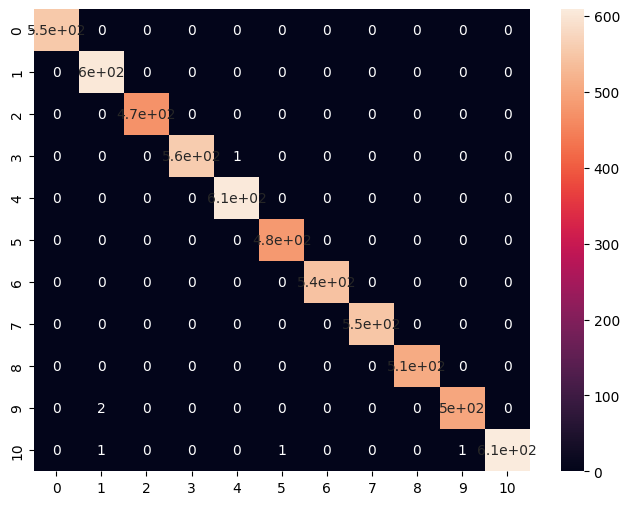

In [186]:
# visualising the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_m, annot = True)
plt.show()

**SUBMISSION**

In [187]:
X_test_set = df_test['text_clean']
vectorize = cv.transform(X_test_set)

In [188]:
df_test['lang_id'] = model_M.predict(vectorize)

In [189]:
submission = df_test[['index', 'lang_id']]
submission.to_csv('Submission.csv', index=False)
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


In [190]:
df_test.head()

,index,text,text_clean,lang_id
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlele...,tsn
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...,nbl
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.,ven
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...,ssw
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.,afr
